### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
Turtle Games is a game manufacturer and retailer who manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points 
- how useful are remuneration and spending scores data 
- can social data (e.g. customer reviews) be used in marketing campaigns 
- what is the impact on sales per product 
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) 
- if there is any possible relationship(s) in sales between North America, Europe, and global sales.

# Week 1 Assignment: Linear Regression Using Python
The marketing department of Turtle Games prefers Python for data analysis and requires assistance with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, the possible relationships between the loyalty points, age, remuneration, and spending scores need to be investigated.

## 1. Load And Explore The Data

In [271]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [272]:
# Load the 'turtle reviews' CSV file as reviews using the pd.read_csv() method.
reviews = pd.read_csv('turtle_reviews.csv')

# View the 'reviews' DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [273]:
# Sense - Check 'reviews' by previewing the data using the head() method.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [274]:
# Sense - Check 'reviews' by checking the column data types.
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [275]:
# Sense - Check 'reviews' checking the the shape of the dataframe (i.e.the number of rows and columns).
reviews.shape

(2000, 11)

In [276]:
# Sense - Check 'reviews' by checking the column names of the dataframe.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [277]:
# Sense - Check 'reviews' by checking the metadata of the dataframe using the .info() function.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [278]:
# Check 'reviews' for any missing data using the .isnull() and .sum() functions.
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [279]:
# Obtain the descriptive statistics of 'reviews' using the .describe() function.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop Columns

In [280]:
# Drop unnecessary columns (which are language and platform).
reviews_2 = reviews.drop(['language', 'platform'], axis=1)

# View column names to ensure that the 'language' and 'platform' columns have been dropped.
reviews_2.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename Columns

In [281]:
# Rename the remuneration and spending score column headers so that they are easier to reference.
reviews_3 = reviews_2.rename(columns={'remuneration (k£)': 'remuneration',
                                      'spending_score (1-100)': 'spend_score'})

# View column names to ensure that the 'remuneration (k£)' and 'spending_score (1-100)' columns have been renamed.
reviews_3.columns

Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save The DataFrame As A CSV File

In [282]:
# Create a CSV file as output using the to_csv() method.
reviews_3.to_csv('reviews_final.csv',index=False)

In [283]:
# Import new CSV file as 'reviews_final' using the pd.read_csv() method.
reviews_final = pd.read_csv('reviews_final.csv')

# View DataFrame.
reviews_final

,gender,age,remuneration,spend_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [284]:
# Sense - Check 'reviews_final' checking the the shape of the dataframe (i.e.the number of rows and columns).
reviews_final.shape

(2000, 9)

In [285]:
# Sense - Check 'reviews_final' by checking the column names of the dataframe.
reviews_final.columns

Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [286]:
# Sense - Check 'reviews_final' by checking the metadata of the dataframe using the .info() function
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [287]:
# Obtain the descriptive of the 'reviews_final' using the .describe() function.
reviews_final.describe()

,age,remuneration,spend_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Outlier Analysis

Before begining any analysis of the obtained data, the values should be analysed to check for and remove any possible outlier values. This can be done through the use of box plots in addition to a user defined function to check for and report any outliers

<AxesSubplot:ylabel='loyalty_points'>

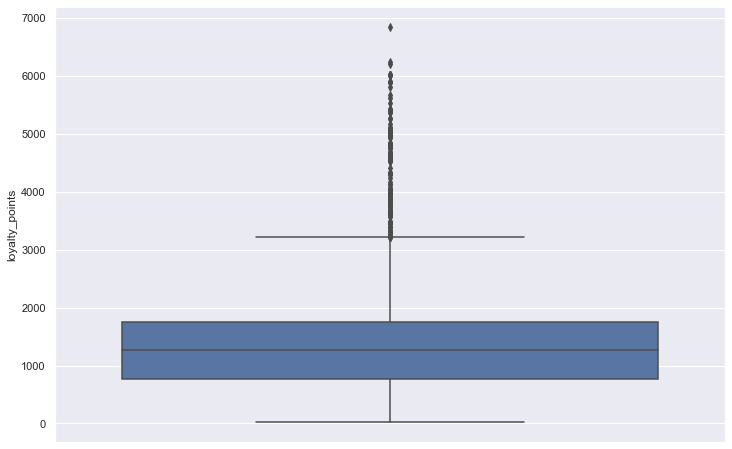

In [288]:
# Create a boxplot to check the loyalty point values for outliers via the use of Seaborn.
sns.boxplot(y = 'loyalty_points', data = reviews_final)

In [289]:
# Create a user defined function to identify the exact values of the outliers in the loyalty_points column.
def find_outliers_IQR(df):
    q1=reviews_final['loyalty_points'].quantile(0.25)
    q3=reviews_final['loyalty_points'].quantile(0.75)
    IQR=q3-q1
    outliers = reviews_final['loyalty_points']\
    [((reviews_final['loyalty_points'] <(q1-1.5*IQR)) | (reviews_final['loyalty_points'] >(q3+1.5*IQR)))]
    return outliers

# Check the outlier value range to observe the minimum and maximum outlier values.
outliers = find_outliers_IQR(reviews_final['loyalty_points'])
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))

max outlier value:6847
min outlier value:3221


<AxesSubplot:ylabel='loyalty_points'>

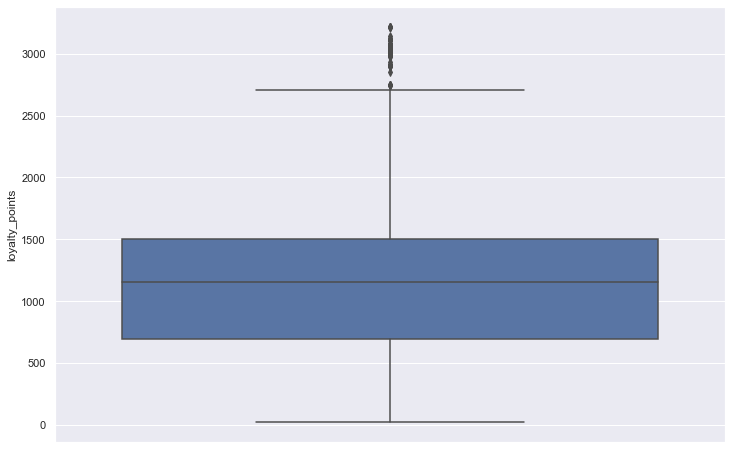

In [290]:
# Clean up the data by removing the outliers.
reviews_final = reviews_final[reviews_final.loyalty_points < 3221]

# Create another loyalty point boxplot to check for any further outliers via the use of Seaborn.
sns.boxplot(y = 'loyalty_points', data = reviews_final)

In [291]:
# Check the outlier value range to observe the range of the outlier values.
outliers = find_outliers_IQR(reviews_final['loyalty_points'])
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))

max outlier value:3218
min outlier value:2750


<AxesSubplot:ylabel='loyalty_points'>

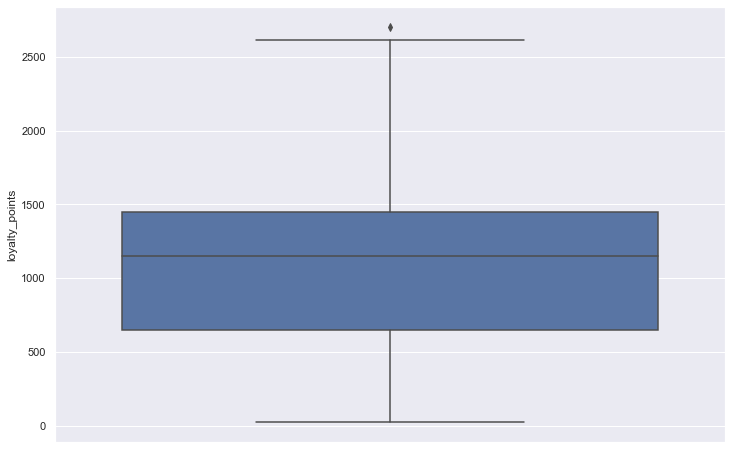

In [292]:
# Clean up the data by removing the outliers.
reviews_final = reviews_final[reviews_final.loyalty_points < 2750]

# Create another loyalty point boxplot to check for any further outliers via the use of Seaborn.
sns.boxplot(y = 'loyalty_points', data = reviews_final)

In [293]:
# Check the outlier value range to observe the minimum and maximum outlier values.
outliers = find_outliers_IQR(reviews_final['loyalty_points'])
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))

max outlier value:2705
min outlier value:2705


<AxesSubplot:ylabel='loyalty_points'>

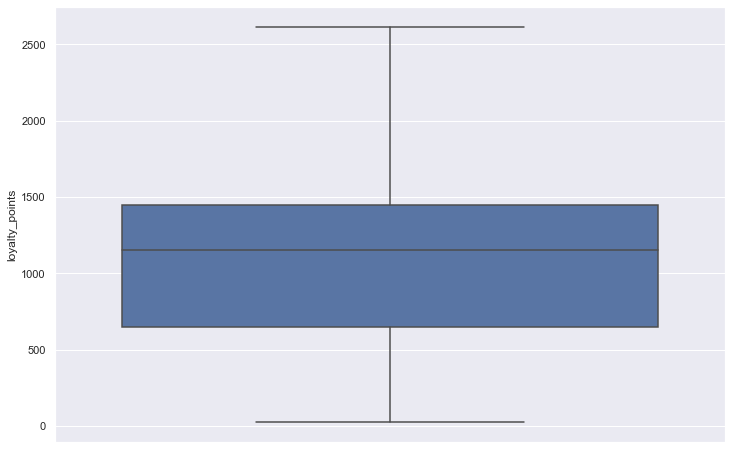

In [294]:
# Clean up the data by removing the outliers.
reviews_final = reviews_final[reviews_final.loyalty_points < 2705]

# Create another loyalty point boxplot to check for any further outliers via the use of Seaborn.
sns.boxplot(y = 'loyalty_points', data = reviews_final)

**NO MORE OUTLIERS OBSERVED SO NO FURTHER ACTION TO BE TAKEN FOR THE LOYALTY POINTS**

<AxesSubplot:ylabel='remuneration'>

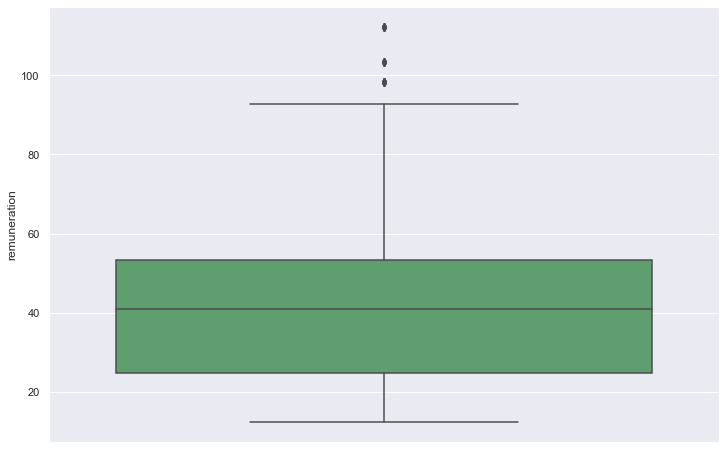

In [295]:
# Create a boxplot to check the remuneration values for outliers via the use of Seaborn.
sns.boxplot(y = 'remuneration', data = reviews_final, color = 'g')

In [296]:
# Create a user defined function to identify outliers in the remuneration column.
def find_outliers_IQR_b(df):
    q1_b=reviews_final['remuneration'].quantile(0.25)
    q3_b=reviews_final['remuneration'].quantile(0.75)
    IQR_b=q3_b-q1_b
    outliers_b = reviews_final['remuneration']\
    [((reviews_final['remuneration'] <(q1_b-1.5*IQR_b)) | (reviews_final['remuneration'] >(q3_b+1.5*IQR_b)))]
    return outliers_b

# Check the outlier value range to observe the minimum and maximum outlier values.
outliers_b = find_outliers_IQR_b(reviews_final['remuneration'])
print('max outlier value:' + str(outliers_b.max()))
print('min outlier value:' + str(outliers_b.min()))

max outlier value:112.34
min outlier value:98.4


<AxesSubplot:ylabel='remuneration'>

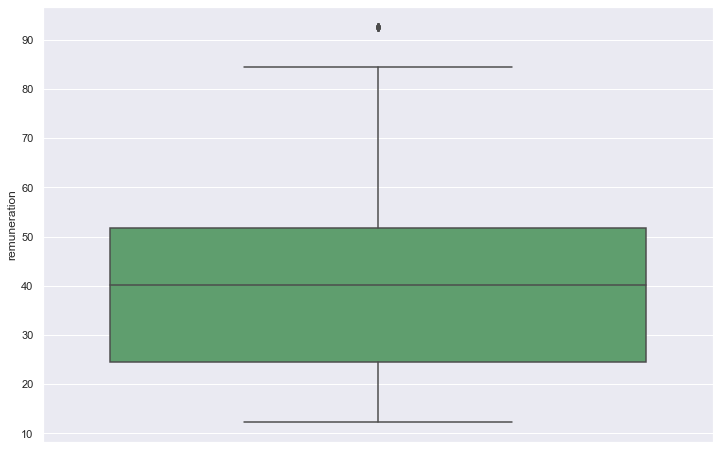

In [297]:
# Clean up the data by removing the outliers.
reviews_final = reviews_final[reviews_final.remuneration < 98.4]

# Create another remuneartion boxplot to check for any further outliers via the use of Seaborn.
sns.boxplot(y = 'remuneration', data = reviews_final, color = 'g')

In [298]:
# Check the outlier value range to observe the minimum and maximum outlier values.
outliers_b = find_outliers_IQR_b(reviews_final['remuneration'])
print('max outlier value:' + str(outliers_b.max()))
print('min outlier value:' + str(outliers_b.min()))

max outlier value:92.66
min outlier value:92.66


<AxesSubplot:ylabel='remuneration'>

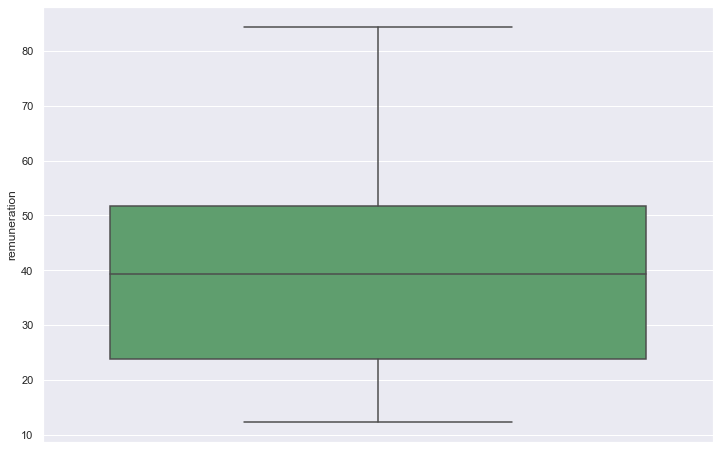

In [299]:
# Clean up the data by removing the outliers.
reviews_final = reviews_final[reviews_final.remuneration < 92.66]

# Create another remuneartion boxplot to check for any further outliers via the use of Seaborn.
sns.boxplot(y = 'remuneration', data = reviews_final, color = 'g')

**NO MORE OUTLIERS OBSERVED SO NO FURTHER ACTION TO BE TAKEN FOR REMUNERATION**

<AxesSubplot:ylabel='spend_score'>

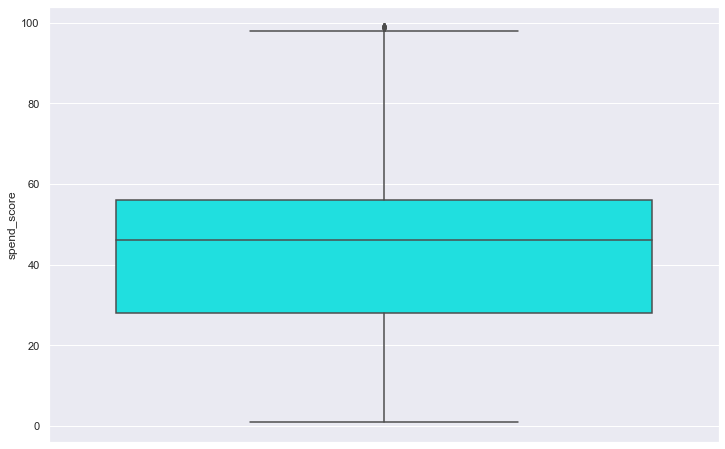

In [300]:
# Create a boxplot to check the spend_score values for outliers via the use of Seaborn
sns.boxplot(y = 'spend_score', data = reviews_final, color = 'cyan')

In [301]:
# Create a function to identify outliers in the spend_score column.
def find_outliers_IQR_c(df):
    q1_c=reviews_final['spend_score'].quantile(0.25)
    q3_c=reviews_final['spend_score'].quantile(0.75)
    IQR_c=q3_c-q1_c
    outliers_c = reviews_final['spend_score']\
    [((reviews_final['spend_score'] <(q1_c-1.5*IQR_c)) | (reviews_final['spend_score'] >(q3_c+1.5*IQR_c)))]
    return outliers_c

# Check the outlier value range to observe the minimum and maximum outlier values.
outliers_c = find_outliers_IQR_c(reviews_final['spend_score'])
print('max outlier value:' + str(outliers_c.max()))
print('min outlier value:' + str(outliers_c.min()))

max outlier value:99
min outlier value:99


<AxesSubplot:ylabel='spend_score'>

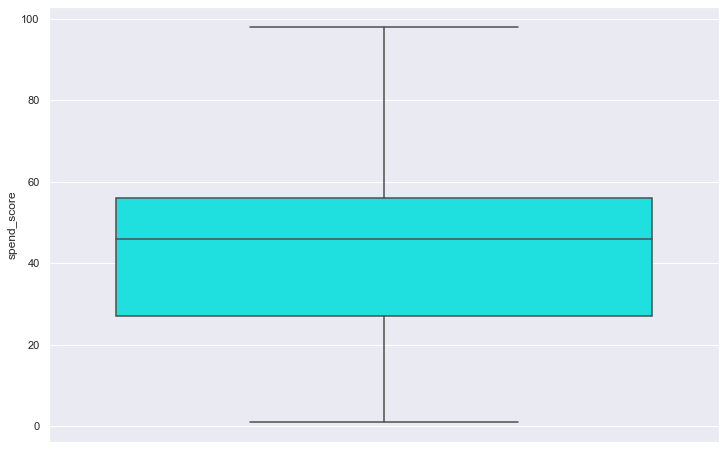

In [302]:
# Clean up the data by removing the outliers.
reviews_final = reviews_final[reviews_final.spend_score < 99]

# Create a boxplot to check the spend_score values for any further outliers via the use of Seaborn.
sns.boxplot(y = 'spend_score', data = reviews_final, color = 'cyan')

**NO MORE OUTLIERS OBSERVED SO NO FURTHER ACTION TO BE TAKEN FOR SPEND_SCORE**

<AxesSubplot:ylabel='age'>

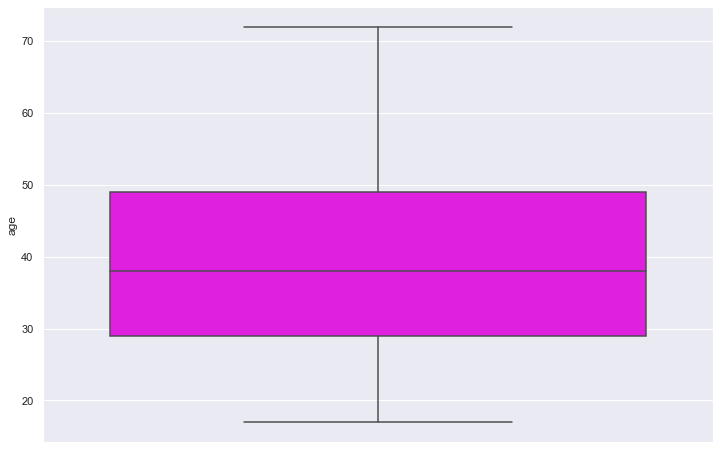

In [303]:
# Create a boxplot to check the age values for outliers via the use of Seaborn.
sns.boxplot(y = 'age', data = reviews_final, color = 'magenta')

**NO OUTLIERS OBSERVED SO NO ACTION TO BE TAKEN FOR AGE**

<AxesSubplot:ylabel='product'>

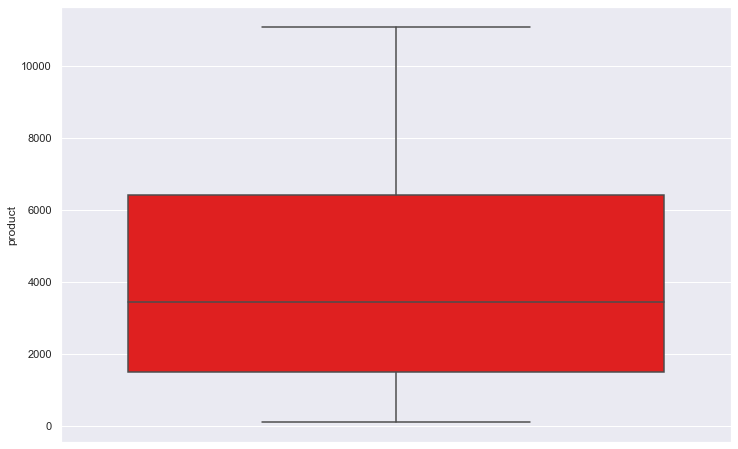

In [304]:
# Create a boxplot to check the product values for outliers via the use of Seaborn.
sns.boxplot(y = 'product', data = reviews_final, color = 'red')

**NO OUTLIERS OBSERVED SO NO ACTION TO BE TAKEN FOR PRODUCT**

## 6. Linear Regression

### 6a) Spending vs Loyalty

In [305]:
# Define the independent variable.
x = reviews_final['spend_score']

# Define the dependent variable.
y = reviews_final['loyalty_points']

# Obtain the OLS model and summary.
a = 'y ~ x'
test_1 = ols(a, data = reviews_final).fit()
test_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     591.2
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          3.35e-111
Time:                        14:59:56   Log-Likelihood:                -11985.
No. Observations:                1583   AIC:                         2.397e+04
Df Residuals:                    1581   BIC:                         2.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    503.6209     25.625     19.653      0.000     453.357     553.884
x             12.7162      0.523     24.314      0.000      11.690      13.742
==============================================================================
Omnibus:                       70.158   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.899
Skew:                           0.084   Prob(JB):                     1.95e-07
Kurtosis:                       2.337   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# Check data for homoscedasticity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_1_BP = sms.het_breuschpagan(test_1.resid, test_1.model.exog)

# Print the results of the Breusch-Pagan test.
terms_1 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_1, test_1_BP)))

{'LM stat': 84.44820302083964, 'LM Test p-value': 3.944135854364878e-20, 'F-stat': 89.09442385981413, 'F-test p-value': 1.2971007494400196e-20}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

Since LM Test p - value is less than 0.05, $H_0$ is rejected and we assume there is heteroscedasticity. 

*This means that the dependant variable (loyalty points) should be transformed to rescale the data.*

In [307]:
# Transform the loyalty points values by square rooting it.
reviews_final['loyalty_root'] = np.sqrt((reviews_final['loyalty_points']))

# View the output.
reviews_final.head()

,gender,age,remuneration,spend_score,loyalty_points,education,product,review,summary,loyalty_root
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,14.491377
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,22.891046
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",6.324555
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,23.706539
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,19.131126


In [308]:
# Define the independent variable.
x = reviews_final['spend_score']

# define the dependent variable.
y = reviews_final['loyalty_root']

# Obtain the OLS model and summary.
a_2 = 'y ~ x'
test_1b = ols(a_2, data = reviews_final).fit()
test_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     810.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.52e-144
Time:                        14:59:56   Log-Likelihood:                -5575.8
No. Observations:                1583   AIC:                         1.116e+04
Df Residuals:                    1581   BIC:                         1.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6040      0.447     43.846      0.000      18.727      20.481
x              0.2598      0.009     28.476      0.000       0.242       0.278
==============================================================================
Omnibus:                      281.200   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.137
Skew:                          -0.338   Prob(JB):                     7.27e-20
Kurtosis:                       2.063   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
# Check data for homoscedasity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_1b_BP = sms.het_breuschpagan(test_1b.resid, test_1b.model.exog)

# Print the results of the Breusch-Pagan test.
terms_1b = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_1b, test_1b_BP)))

{'LM stat': 0.06079275861500244, 'LM Test p-value': 0.805247312384638, 'F-stat': 0.060718283387464454, 'F-test p-value': 0.8053962331445403}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

**Since LM Test p - value is greater than 0.05, $H_0$ is accepted and we assume there is homoscedasticty. Therefore, linear regression analysis can be completed**

In [310]:
# Extract the estimated parameters using test_1b.
print("Parameters: ", test_1b.params)

# Extract the standard errors using test_1b.
print("Standard errors: ", test_1b.bse)

# Extract the predicted values using test_1b.
print("Predicted values: ", test_1b.predict())

Parameters:  Intercept    19.604019
x             0.259849
dtype: float64
Standard errors:  Intercept    0.447113
x            0.009125
dtype: float64
Predicted values:  [29.73811389 40.65175446 21.16311059 ... 22.98205068 24.02144502
 25.58053653]


In [311]:
# Set the X coefficient and the constant to generate the regression table using the parameters extracted from
# test_1b.
y_pred_1b = (19.604019) + 0.259849 * reviews_final['spend_score']

# View the output.
y_pred_1b

0       29.738130
1       40.651788
2       21.163113
3       39.612392
4       29.997979
          ...    
1989    23.501754
1990    39.612392
1991    22.982056
1992    24.021452
1994    25.580546
Name: spend_score, Length: 1583, dtype: float64

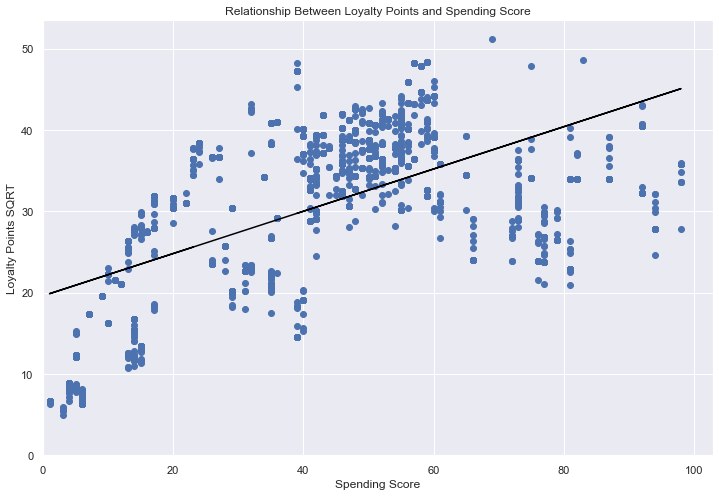

<Figure size 864x576 with 0 Axes>

In [312]:
# Plot the graph with a black regression line.
plt.scatter(x, y)
plt.plot(x, y_pred_1b, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add title and axis names.
plt.title('Relationship Between Loyalty Points and Spending Score')
plt.ylabel('Loyalty Points SQRT')
plt.xlabel('Spending Score')
 
# View the plot.
plt.show()  

### 6b) Remuneration vs Loyalty

In [313]:
# Define the independent variable.
x = reviews_final['remuneration']

# Define the dependent variable.
y = reviews_final['loyalty_points']

# Obtaian the OLS model and summary.
b = 'y ~ x'
test_2 = ols(b, data = reviews_final).fit()
test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     309.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.27e-63
Time:                        14:59:57   Log-Likelihood:                -12095.
No. Observations:                1583   AIC:                         2.419e+04
Df Residuals:                    1581   BIC:                         2.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    565.0429     30.683     18.416      0.000     504.860     625.226
x             11.9601      0.680     17.586      0.000      10.626      13.294
==============================================================================
Omnibus:                       56.986   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.057
Skew:                          -0.364   Prob(JB):                     2.23e-11
Kurtosis:                       2.537   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
# Check data for homoscedasticity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2_BP = sms.het_breuschpagan(test_2.resid, test_2.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2, test_2_BP)))

{'LM stat': 129.47758750624817, 'LM Test p-value': 5.331508281711841e-30, 'F-stat': 140.83309902058923, 'F-test p-value': 3.5297015799094215e-31}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

Since LM Test p - value is less than 0.05, $H_0$ is rejected and we assume there is heteroscedasticity. 

*This means that the square root of loyalty_points should be tried again instead of loyalty_points.*

In [315]:
# Try again using the square root of loyalty points.
# Define the independent variable.
x = reviews_final['remuneration']

# Define the dependent variable.
y = reviews_final['loyalty_root']

# Obtain the OLS model and summary.
b_2 = 'y ~ x'
test_2b = ols(b_2, data = reviews_final).fit()
test_2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     293.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.70e-60
Time:                        14:59:57   Log-Likelihood:                -5768.6
No. Observations:                1583   AIC:                         1.154e+04
Df Residuals:                    1581   BIC:                         1.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0986      0.564     39.173      0.000      20.992      23.205
x              0.2142      0.013     17.134      0.000       0.190       0.239
==============================================================================
Omnibus:                      179.386   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.226
Skew:                          -0.954   Prob(JB):                     1.53e-53
Kurtosis:                       3.208   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
# Check data for homoscedasity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2b_BP = sms.het_breuschpagan(test_2b.resid, test_2b.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2b = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2b, test_2b_BP)))

{'LM stat': 9.794199299232828, 'LM Test p-value': 0.0017506322175143297, 'F-stat': 9.842723110472638, 'F-test p-value': 0.0017364951847439413}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

Since LM Test p - value is less than 0.05, $H_0$ is rejected and we assume there is heteroscedasticity. 

*This means that the dependant variable (loyalty points) should be further transformed to rescale the data again.*

In [317]:
# Transform the loyalty points values by taking the cube root of its values.
reviews_final['loyalty_root_2'] = np.power((reviews_final['loyalty_points']),1/3)

# View the output.
reviews_final.head()

,gender,age,remuneration,spend_score,loyalty_points,education,product,review,summary,loyalty_root,loyalty_root_2
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,14.491377,5.943922
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,22.891046,8.062018
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",6.324555,3.419952
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,23.706539,8.252372
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,19.131126,7.153090


In [318]:
# Define the independent variable.
x = reviews_final['remuneration']

# Define the dependent variable.
y = reviews_final['loyalty_root_2']

# Obtian the OLS model and summary.
b_3 = 'y ~ x'
test_2c = ols(b_3, data = reviews_final).fit()
test_2c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     279.9
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           5.66e-58
Time:                        14:59:57   Log-Likelihood:                -3456.6
No. Observations:                1583   AIC:                             6917.
Df Residuals:                    1581   BIC:                             6928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7040      0.131     58.835      0.000       7.447       7.961
x              0.0486      0.003     16.730      0.000       0.043       0.054
==============================================================================
Omnibus:                      269.205   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.458
Skew:                          -1.195   Prob(JB):                     1.36e-91
Kurtosis:                       3.797   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
# Check data for homoscedasity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_2c_BP = sms.het_breuschpagan(test_2c.resid, test_2c.model.exog)

# Print the results of the Breusch-Pagan test.
terms_2c = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_2c, test_2c_BP)))

{'LM stat': 0.3052749865119285, 'LM Test p-value': 0.5805942206705464, 'F-stat': 0.30494810278161294, 'F-test p-value': 0.5808749581604182}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

**Since LM Test p - value is greater than 0.05, $H_0$ is accepted and we assume there is homoscedasticty. Therefore, linear regression analysis can be completed**

In [320]:
# Extract the estimated parameters using test_2c.
print("Parameters: ", test_2c.params)

# Extract the standard errors using test_2c.
print("Standard errors: ", test_2c.bse)  

# Extract the predicted values using test_2c.
print("Predicted values: ", test_2c.predict())

Parameters:  Intercept    7.704028
x            0.048556
dtype: float64
Standard errors:  Intercept    0.130942
x            0.002902
dtype: float64
Predicted values:  [ 8.30126369  8.30126369  8.34107942 ...  8.50034236 11.80504835
 11.80504835]


In [321]:
# Set the the X coefficient and the constant to generate the regression table using the extracted parameters using 
# test_2c.
y_pred_2c = (7.704028) + 0.048556 * reviews_final['remuneration']

# View the output.
y_pred_2c

0        8.301267
1        8.301267
2        8.341083
3        8.341083
4        8.380899
          ...    
1989     8.500346
1990     8.500346
1991     8.500346
1992    11.805068
1994    11.805068
Name: remuneration, Length: 1583, dtype: float64

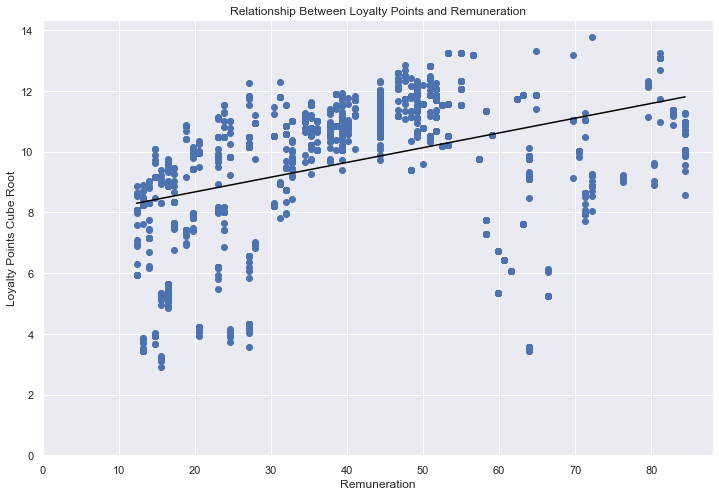

<Figure size 864x576 with 0 Axes>

In [322]:
# Plot the graph with a black regression line.
plt.scatter(x, y)
plt.plot(x, y_pred_2c, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add title and axis names.
plt.title('Relationship Between Loyalty Points and Remuneration')
plt.ylabel('Loyalty Points Cube Root')
plt.xlabel('Remuneration')
 
# View the plot.
plt.show()

# Save the Plot
plt.savefig('Loyalty Points Vs Remuneration.png')  

### 6c) Age vs Loyalty

In [323]:
# Define the independent variable.
x = reviews_final['age']

# Define the dependent variable.
y = reviews_final['loyalty_points']

# Obtain the OLS model and summary.
c = 'y ~ x'
test_3 = ols(c, data = reviews_final).fit()
test_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     32.30
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.57e-08
Time:                        14:59:57   Log-Likelihood:                -12220.
No. Observations:                1583   AIC:                         2.444e+04
Df Residuals:                    1581   BIC:                         2.445e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    841.4263     40.260     20.900      0.000     762.457     920.395
x              5.3278      0.937      5.683      0.000       3.489       7.167
==============================================================================
Omnibus:                       49.202   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.797
Skew:                          -0.217   Prob(JB):                     1.25e-07
Kurtosis:                       2.458   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
# Check data for homoscedasticity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3_BP = sms.het_breuschpagan(test_3.resid, test_3.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3, test_3_BP)))

{'LM stat': 37.36202613439851, 'LM Test p-value': 9.811400226467673e-10, 'F-stat': 38.2168168207934, 'F-test p-value': 8.040385978372136e-10}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

Since LM Test p - value is less than 0.05, $H_0$ is rejected and we assume there is heteroscedasticity. 

*This means that the square root of loyalty_points should be tried again instead of loyalty_points.*

In [325]:
# Try again using the square root of loyalty points
# Define the independent variable.
x = reviews_final['age']

# Define the dependent variable.
y = reviews_final['loyalty_root']

# Obtain the OLS model and summary.
c_2 = 'y ~ x'
test_3b = ols(c_2, data = reviews_final).fit()
test_3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     15.79
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.40e-05
Time:                        14:59:57   Log-Likelihood:                -5895.6
No. Observations:                1583   AIC:                         1.180e+04
Df Residuals:                    1581   BIC:                         1.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1348      0.741     37.972      0.000      26.682      29.588
x              0.0686      0.017      3.973      0.000       0.035       0.102
==============================================================================
Omnibus:                      160.150   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.136
Skew:                          -0.894   Prob(JB):                     1.42e-46
Kurtosis:                       3.086   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
# Check data for homoscedasticity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3b_BP = sms.het_breuschpagan(test_3b.resid, test_3b.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3b = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3b, test_3b_BP)))

{'LM stat': 23.1151334248788, 'LM Test p-value': 1.525850336988733e-06, 'F-stat': 23.42802775244025, 'F-test p-value': 1.4233959708484098e-06}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

Since LM Test p - value is less than 0.05, $H_0$ is rejected and we assume there is heteroscedasticity. 

*This means that the cube root of loyalty_points should be tried instead of loyalty_points or the square root of loyalty_points.*

In [327]:
# Try again using the cube root of loyalty points
# Define the independent variable.
x = reviews_final['age']

# Define the dependent variable.
y = reviews_final['loyalty_root_2']

# Obtain the OLS model and summary.
c_3 = 'y ~ x'
test_3c = ols(c_3, data = reviews_final).fit()
test_3c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.70
Date:                Wed, 21 Dec 2022   Prob (F-statistic):            0.00109
Time:                        14:59:57   Log-Likelihood:                -3580.3
No. Observations:                1583   AIC:                             7165.
Df Residuals:                    1581   BIC:                             7175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1716      0.172     53.439      0.000       8.835       9.508
x              0.0131      0.004      3.272      0.001       0.005       0.021
==============================================================================
Omnibus:                      254.361   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.718
Skew:                          -1.161   Prob(JB):                     1.75e-84
Kurtosis:                       3.673   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
# Check data for homoscedasticity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3c_BP = sms.het_breuschpagan(test_3c.resid, test_3c.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3c = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3c, test_3c_BP)))

{'LM stat': 17.752976802043193, 'LM Test p-value': 2.5152362077323133e-05, 'F-stat': 17.93164651205392, 'F-test p-value': 2.4216930609533417e-05}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

Since LM Test p - value is less than 0.05, $H_0$ is rejected and we assume there is heteroscedasticity. 

*This means that the dependant variable (loyalty points) should be further transformed to rescale the data again.*

In [329]:
# Transform the loyalty points values by taking the reciprical of the square of its values.
reviews_final['loyalty_rec'] = 1/(np.power((reviews['loyalty_points']),2))

# View Output
reviews_final.head()

,gender,age,remuneration,spend_score,loyalty_points,education,product,review,summary,loyalty_root,loyalty_root_2,loyalty_rec
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,14.491377,5.943922,0.000023
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,22.891046,8.062018,0.000004
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",6.324555,3.419952,0.000625
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,23.706539,8.252372,0.000003
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,19.131126,7.153090,0.000007


In [330]:
# Define the independent variable.
x = reviews_final['age']

# Define the dependent variable.
y = reviews_final['loyalty_rec']

# Obtain the OLS model and summary.
c_4 = 'y ~ x'
test_3d = ols(c_4, data = reviews_final).fit()
test_3d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.882
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0490
Time:                        14:59:57   Log-Likelihood:                 12002.
No. Observations:                1583   AIC:                        -2.400e+04
Df Residuals:                    1581   BIC:                        -2.399e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.188e-05   9.11e-06      1.303      0.193      -6e-06    2.98e-05
x           4.181e-07   2.12e-07      1.970      0.049    1.85e-09    8.34e-07
==============================================================================
Omnibus:                     1902.361   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166331.900
Skew:                           6.384   Prob(JB):                         0.00
Kurtosis:                      51.567   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
# Check data for homoscedasticity as this is a necessary assumption for linear regression analysis.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test_3d_BP = sms.het_breuschpagan(test_3d.resid, test_3d.model.exog)

# Print the results of the Breusch-Pagan test.
terms_3d = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_3d, test_3d_BP)))

{'LM stat': 2.975172985527683, 'LM Test p-value': 0.08455108763389697, 'F-stat': 2.9770092277646754, 'F-test p-value': 0.0846506074303529}


$H_0$ = Homoscedasticity (for LM Test p-value greater than or equal to 0.05)

$H_a$ = Heteroscedasticity (for LM Test p-value less than 0.05)

**Since LM Test p - value is greater than 0.05, $H_0$ is accepted and we assume there is homoscedasticty. Therefore, linear regression analysis can be completed**

In [332]:
# Extract the estimated parameters using test_3d.
print("Parameters: ", test_3d.params) 

# Extract the standard errors using test_3d.
print("Standard errors: ", test_3d.bse)

# Extract the predicted values using test_3d.
print("Predicted values: ", test_3d.predict())

Parameters:  Intercept    1.187546e-05
x            4.181065e-07
dtype: float64
Standard errors:  Intercept    9.113527e-06
x            2.122157e-07
dtype: float64
Predicted values:  [1.94013763e-05 2.14919088e-05 2.10738023e-05 ... 2.60910802e-05
 2.65091867e-05 3.06902516e-05]


In [333]:
# Set the X coefficient and the constant to generate the regression table using the extracted parameters using 
# test_3d.
y_pred_3d = (1.187546e-05) + (4.181065e-07) * reviews_final['age']

# View the output.
y_pred_3d

0       0.000019
1       0.000021
2       0.000021
3       0.000022
4       0.000026
          ...   
1989    0.000028
1990    0.000027
1991    0.000026
1992    0.000027
1994    0.000031
Name: age, Length: 1583, dtype: float64

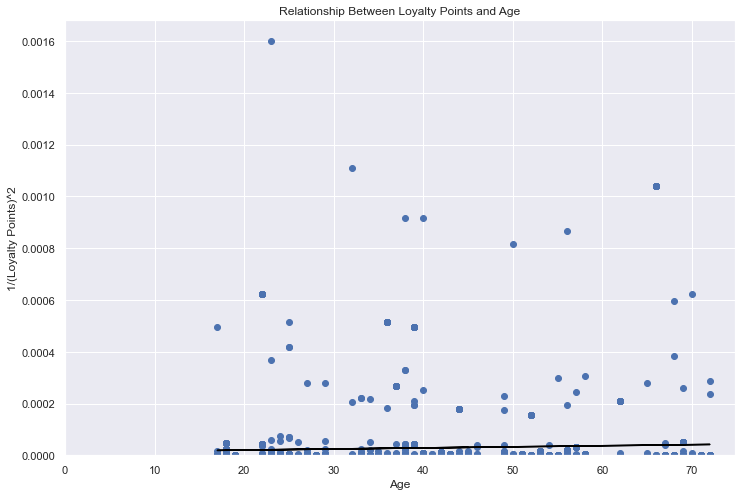

<Figure size 864x576 with 0 Axes>

In [334]:
# Plot graph with a black regression line.
plt.scatter(x, y)
plt.plot(x, y_pred_3d, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add title and axis names.
plt.title('Relationship Between Loyalty Points and Age')
plt.ylabel('1/(Loyalty Points)^2')
plt.xlabel('Age')

# View the plot.
plt.show()

# Save the Plot
plt.savefig('Loyalty Points Vs Age.png')  

## 6. Observations And Insights

1.   Strong Positive Correlation between loyalty points and spending score. This is the same for the relationship between        loyalty points and remuneration. On the other hand, the relationship between loyalty points and age is one that            displays weak positive correlation only.



2.   Each relationship plot requires loyalty points to be transformed by a different factor in order to achieve sufficent        homoscedasticity. For spending score and remuneration respectively, the loyalty points are square rooted and cube 
     rooted respectively. However, for age, the reciprical of the square of the loyalty points is required instead.
     
     
3.   Considering the fact that all 3 plots have had the loyalty_points values transformed in different manners to achieve        homoscedasticity so it is useless to compare the different adjusted R squared values as the differing natures of the        transformations means that the variance and its units will vary across the 3 plots. Additionally, the adjusted R            squared values for all 3 plots can be explained by the fact the dependant variable (loyalty_points) has had to undergo      transformations in order to achieve homoscedasticity.

# 

# Week 2 Assignment: Clustering With *k*-means Using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. Therefore, it is necessary to identify groups within the customer base that can be used to target specific market segments. This will be completed via the utilisation of *k*-means clustering to identify the optimal number of clusters and then applying and plotting the data using the created segments.

## 1. Load And Explore The Data

In [335]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [336]:
# Load the 'reviews_final' CSV file as 'df2'.
df2 = pd.read_csv('reviews_final.csv')

# View the 'df2' DataFrame.
df2

,gender,age,remuneration,spend_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [337]:
# Create a new dataframe called 'df2a', where all unnecessary columns from df2 are dropped. 
# This means that the only columns in 'df2a' are remuneration and spend_score.
df2a = df2.drop(['gender','age','loyalty_points','education',
                 'product','review','summary'], axis=1)

# View the 'df2a' DataFrame.
df2a

,remuneration,spend_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [338]:
# Explore the dataframe by previewing the data through the head() method.
df2a.head()

,remuneration,spend_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [339]:
# View the shape of the 'df2a' dataframe (i.e. the number of rows and columns in the dataframe).
df2a.shape

(2000, 2)

In [340]:
# View the data types of the columns of the 'df2a' dataframe.
df2a.dtypes

remuneration    float64
spend_score       int64
dtype: object

In [341]:
# View the column names of the 'df2a' dataframe.
df2a.columns

Index(['remuneration', 'spend_score'], dtype='object')

In [342]:
# View the metadata of the 'df2a' dataframe using the .info() function
df2a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   remuneration  2000 non-null   float64
 1   spend_score   2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [343]:
# Obtain the descriptive statistics of the 'df2a' dataframe using .describe() function
df2a.describe()

,remuneration,spend_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='spend_score', ylabel='remuneration'>

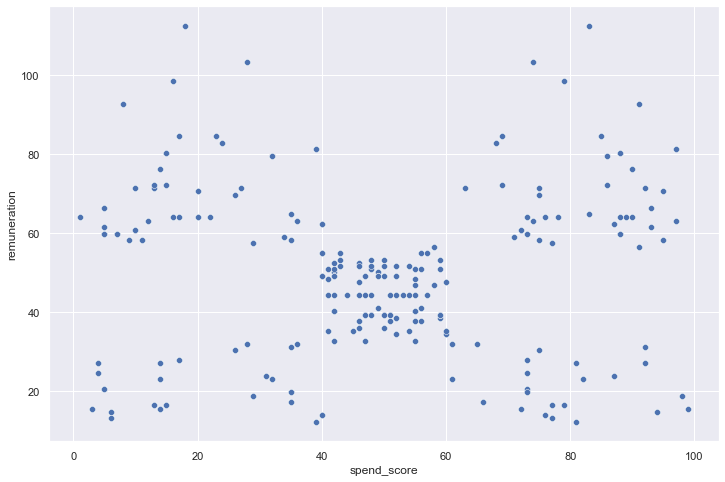

In [344]:
# Create a scatterplot with Seaborn using the 'df2a' dataframe.
sns.scatterplot(x='spend_score', y='remuneration', data=df2a)

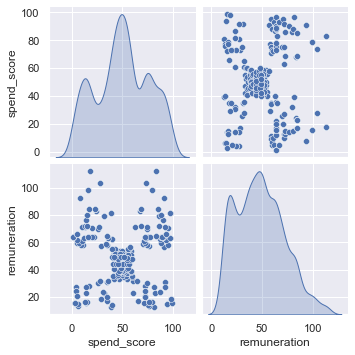

In [345]:
# Create a pairplot with Seaborn using the 'df2a' dataframe.
x = df2a[['spend_score', 'remuneration']]

# kde = kernel density estimation. It is a non-parametric way to estimate the probability density function.
sns.pairplot(df2a, vars=x, diag_kind= 'kde')

## 3. Elbow and Silhoutte Methods

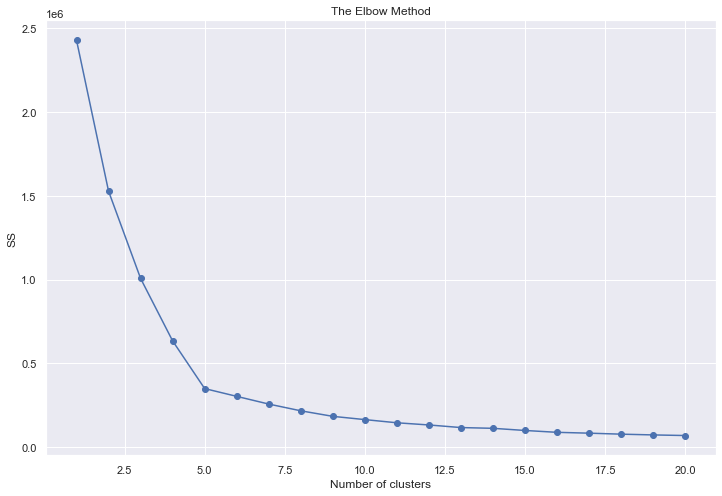

In [346]:
# Determine the number of clusters via the Elbow Method.
ss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, 
                    n_init = 10, random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 21), ss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

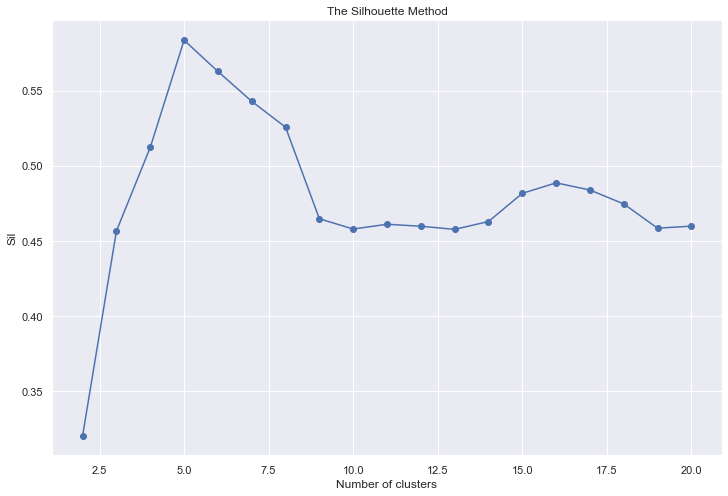

In [347]:
# Determine the number of clusters via the Silhouette Method.
sil = []
kmax = 20

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the Silhouette Method.
plt.plot(range(2, kmax+1), sil, marker='o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()

## 4. Evaluate The k-means Model At Different Values of *k*

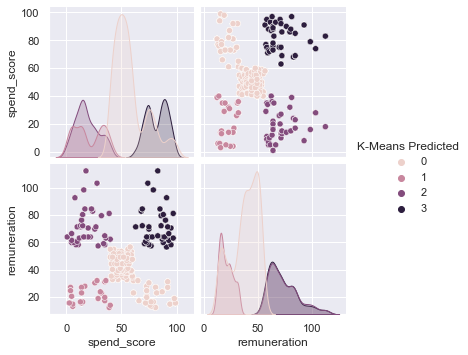

In [348]:
# Use 4 clusters.
# Create kmeans object based on the KMeans() class.
kmeans = KMeans(n_clusters = 4, max_iter = 15000, 
                init='k-means++', random_state=0).fit(x)

# Identify the clusters using labels and predicted values.
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

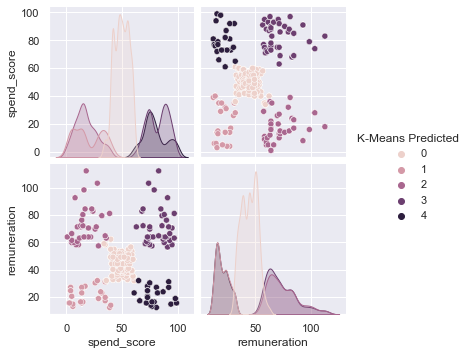

In [349]:
# Use 5 clusters.
# Create kmeans object based on the KMeans() class.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, 
                init='k-means++', random_state=0).fit(x)

# Identify the clusters using labels and predicted values.
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

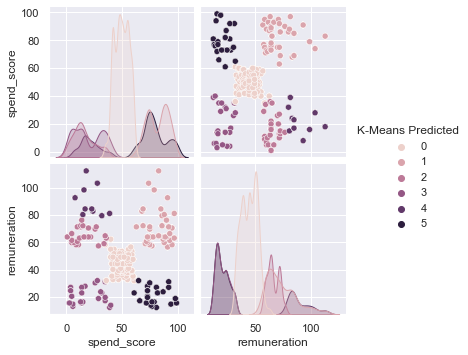

In [350]:
# Use 6 clusters.
# Create kmeans object based on the KMeans() class
kmeans = KMeans(n_clusters = 6, max_iter = 15000, 
                init='k-means++', random_state=0).fit(x)

# Identify the clusters using labels and predicted values
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit The Final Model And Justify Your Choice

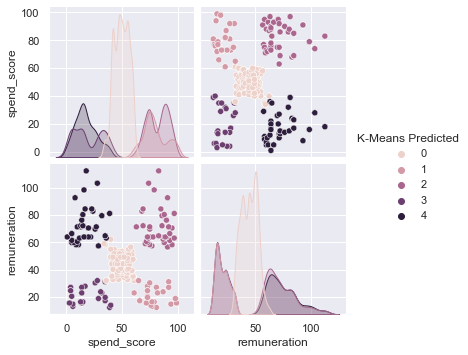

In [351]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, max_iter = 15000,
                init='k-means++', random_state=42).fit(x)

# Identify the clusters using labels and predicted values
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [352]:
# Check the number of observations per predicted class using the value_counts() method.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot And Interpret The Clusters

In [353]:
# View the K-Means predicted.
print(x.head())

   spend_score  remuneration  K-Means Predicted
0           39         12.30                  3
1           81         12.30                  1
2            6         13.12                  3
3           77         13.12                  1
4           40         13.94                  3


,spend_score,remuneration,K-Means Predicted
0,39,12.30,3
1,81,12.30,1
2,6,13.12,3
3,77,13.12,1
4,40,13.94,3
...,...,...,...
1995,69,84.46,2
1996,8,92.66,4
1997,91,92.66,2
1998,16,98.40,4


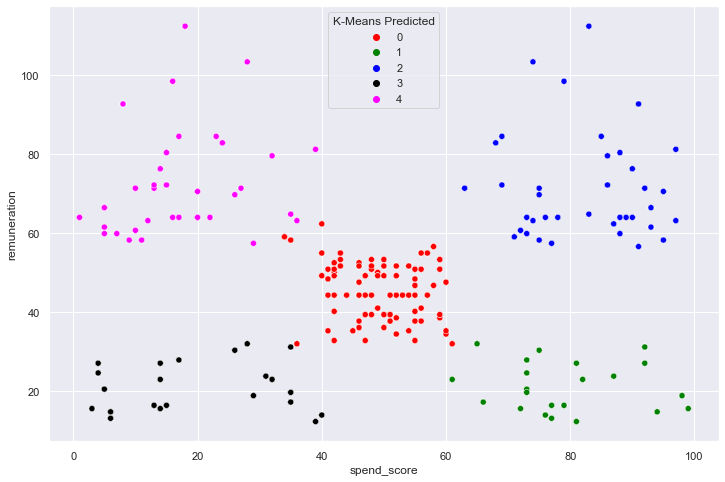

In [354]:
# Set the plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Visualising the clusters via a Seaborn sactterplot.
sns.scatterplot(x='spend_score', y ='remuneration', data=x, hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'magenta'])

# View the 'x' dataframe.
x

## 7. Discuss: Insights And Observations

1. Using the Elbow Method, it was determined that the elbow - lime feature occured at clusters = 5. The peak of the            sillhouette method also occured at clusters = 5. Therefore k = 5 was used in the final model


2. It can be noted that some data points of a particular cluster may be in very close proximity to other clusters. For        there are couple of points in the central red cluster which lie very close to the magenta and black clusters. 


3. Additionally some data points within a particular cluster appear to lie in a position far away from other data points      within the same cluster. However, attempting to break these clusters down into smaller clusters would make the final        model less accurate as a cluster number greater than 5 would begin to produce smaller and smaller sillhouette values        which would then indicate that fewer points are being put in the correct cluster

# 

# Week 3 Assignment: NLP Using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [355]:
# Import necessary packages.
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

# Import WordCloud
from wordcloud import WordCloud

# Import ntlk and the required resources
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download ('punkt')
nltk.download ('stopwords')

# Import TextBlob and norm
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

# Ensure that any warnings are removed.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [356]:
# Load the 'reviews_final' data set as 'df3'.
df3 = pd.read_csv('reviews_final.csv')

# View the 'df3' DataFrame.
df3

,gender,age,remuneration,spend_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [357]:
# Sense - Check 'df3' checking the the shape of the dataframe (i.e., the number of rows and columns in the dataframe)
df3.shape

(2000, 9)

In [358]:
# Sense - Check 'df3' by checking the column data types
df3.dtypes

gender             object
age                 int64
remuneration      float64
spend_score         int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object

In [359]:
# Sense - Check 'df3' by checking the column names
df3.columns

Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [360]:
# Explore 'df3' by checking its metadata
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [361]:
# Obtain the descriptive statistics for 'df3'
df3.describe()

,age,remuneration,spend_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [362]:
# Create a new dataframe keeping only the 'review' and 'summary' columns.
# All other columns are dropped from the original dataframe
df3a = df3.drop(['gender','age','remuneration', 'spend_score','loyalty_points',
                 'education','product'], axis=1)

# View the new dataframe.
df3a

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [363]:
# Determine if there are any missing values in 'df3a'
print(df3a.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [364]:
# Copy the previous dataframe under another variable
df3b = df3a

In [365]:
# Change all the 'review' column to lower case and join with a space
df3b['review'] = df3b['review'].apply(lambda a: " ".join(a.lower() for a in a.split()))

# Change all the 'summary' column to lower case and join with a space
df3b['summary'] = df3b['summary'].apply(lambda b: " ".join(b.lower() for b in b.split()))

# View the dataframe
df3b

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [366]:
# Remove all punctuation in the 'review' colum
df3b['review'] = df3b['review'].str.replace('[^\w\s]','')

# Remove all punctuation in the 'review' colum
df3b['summary'] = df3b['summary'].str.replace('[^\w\s]','')

# View output.
df3b

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [367]:
# Check the number of duplicate values in the review column.
df3b.duplicated().sum()

39

In [368]:
# Drop duplicates.
df3c = df3b.drop_duplicates(keep ='first', ignore_index = True)


# Preview data.
df3c.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [369]:
# View the shape of the data.
df3c.shape

(1961, 2)

## 3. Tokenise and Create WordClouds

### 3a) Tokenisation

In [370]:
# Copy the 'df3c' dataframe
df3d = df3c

# View DataFrame.
df3d

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars


In [371]:
# Tokenisation of review.
df3d['rev_tokens'] = df3d['review'].apply(word_tokenize)

# Tokenisation of summary.
df3d['sum_tokens'] = df3d['summary'].apply(word_tokenize)

# Preview the data.
df3d.head()

,review,summary,rev_tokens,sum_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [372]:
# Define an empty list of review tokens.
all_rev_tokens = []

for i in range(df3d.shape[0]):
    all_rev_tokens = all_rev_tokens + df3d['rev_tokens'][i] # Add each token to the list.

# Convert the list to a string
ART = all_rev_tokens
ART_string = ' '.join(map(str, ART))

In [373]:
# Define an empty list of summary tokens.
all_sum_tokens = []

for i in range(df3d.shape[0]):
    all_sum_tokens = all_sum_tokens + df3d['sum_tokens'][i] # Add each token to the list.

# Convert the list to a string
AST = all_sum_tokens
AST_string = ' '.join(map(str, AST))

### 3b) Creation Of WordClouds

#### i) Review

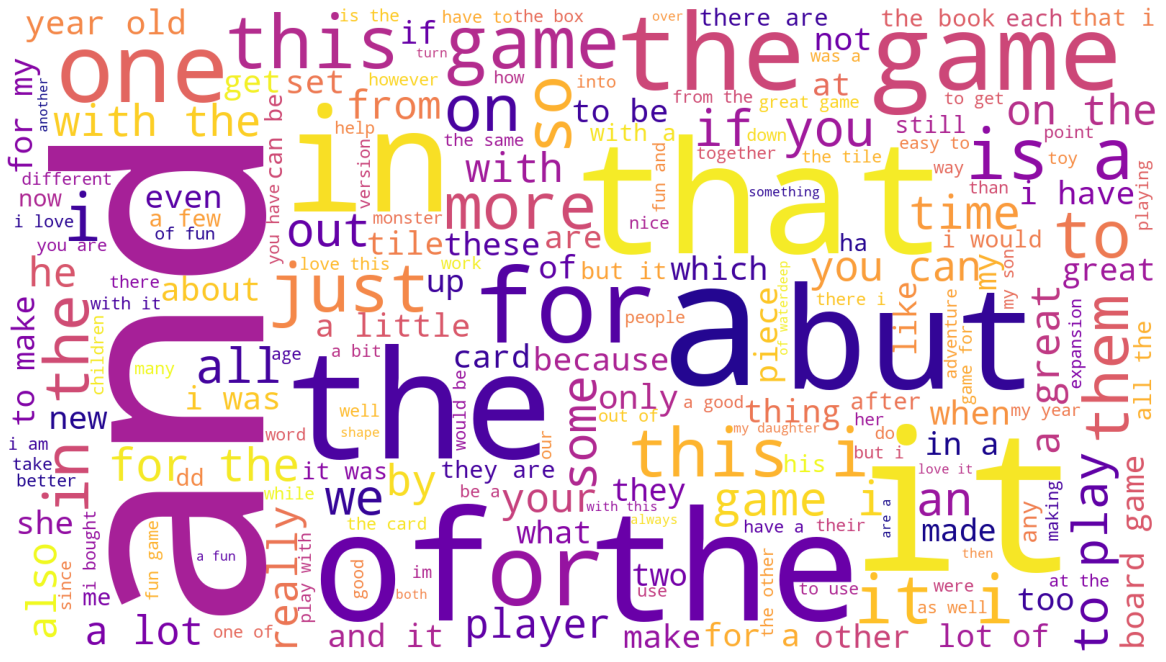

In [374]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_rev = WordCloud(width = 1600, height = 900, 
                           background_color ='white',
                           colormap = 'plasma', 
                           stopwords = 'none',
                           min_font_size = 10).generate(ART_string) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

#### ii) Summary

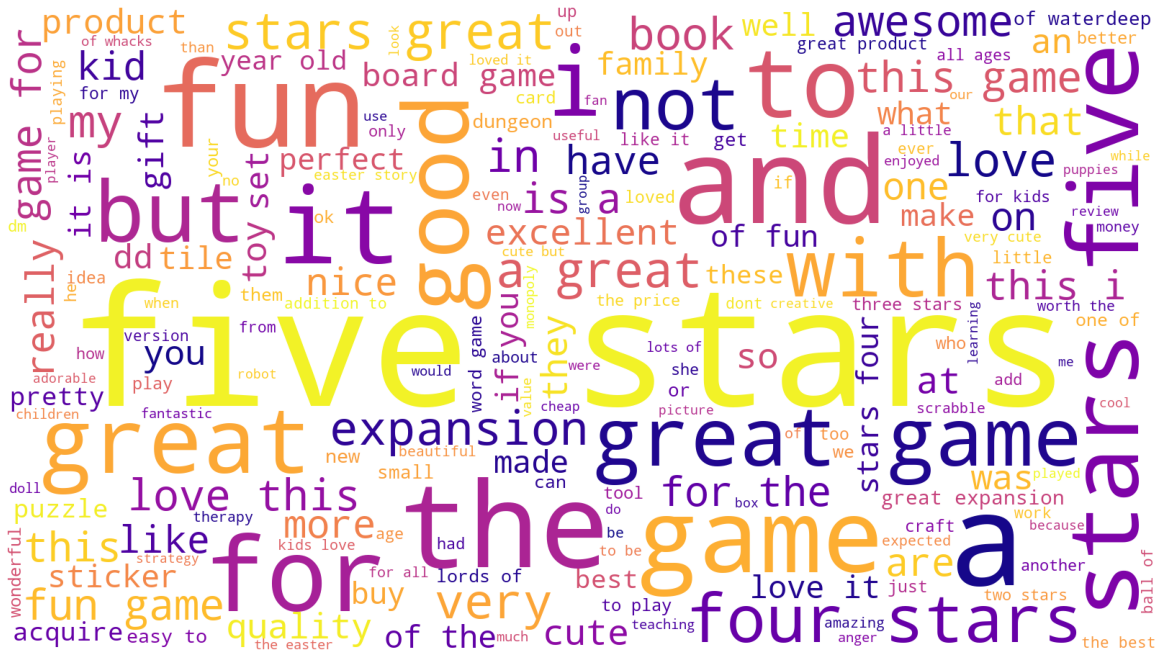

In [375]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_sum = WordCloud(width = 1600, height = 900, 
                           background_color ='white',
                           colormap = 'plasma', 
                           stopwords = 'none',
                           min_font_size = 10).generate(AST_string) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_sum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity

### 4a) Create frequency distribution

#### i) Review

In [376]:
# View the frequency distribution.
fdist_rev = FreqDist(all_rev_tokens)

# Preview the data.
fdist_rev

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

#### ii) Summary

In [377]:
# View the frequency distribution.
fdist_sum = FreqDist(all_sum_tokens)

# Preview the data.
fdist_sum

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [378]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

#### i) Review

In [379]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
rev_tokens_2 = [word for word in all_rev_tokens if word.isalnum()]

# Create a filtered list of tokens without stop words.
rev_tokens_3 = [x for x in rev_tokens_2 if x.lower() not in english_stopwords]

# Define an empty string variable.
rev_tokens_3_string = ''

for value in rev_tokens_3:
    rev_tokens_3_string = rev_tokens_3_string + value + ' ' # Add each filtered token word to the string.

#### ii) Summary

In [380]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
sum_tokens_2 = [word for word in all_sum_tokens if word.isalnum()]

# Create a filtered list of tokens without stop words.
sum_tokens_3 = [x for x in sum_tokens_2 if x.lower() not in english_stopwords]

# Define an empty string variable.
sum_tokens_3_string = ''

for value in sum_tokens_3:
    sum_tokens_3_string = sum_tokens_3_string + value + ' ' # Add each filtered token word to the string.

### 4c) Create wordcloud without stopwords

#### i) Review

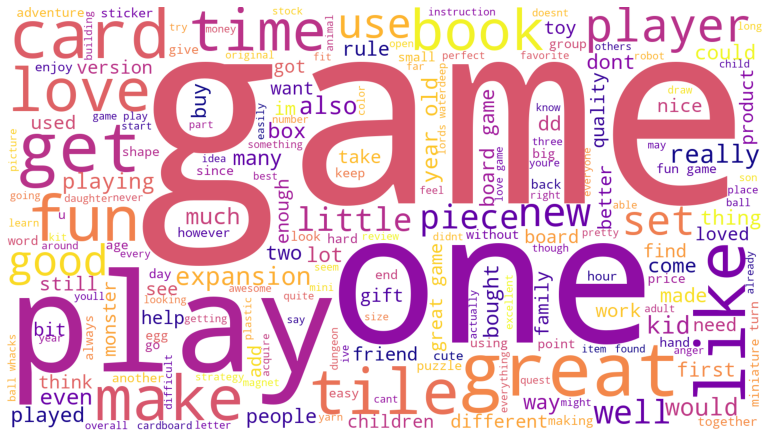

In [405]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
WordCloud_rev_2 = WordCloud(width = 1600, height = 900, 
                           background_color ='white',
                           colormap = 'plasma', 
                           stopwords = 'none',
                           min_font_size = 10).generate(rev_tokens_3_string) 

# Plot the WordCloud image.                    
plt.figure(figsize = (10.5, 6), facecolor = None) 
plt.imshow(WordCloud_rev_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

#### ii) Summary

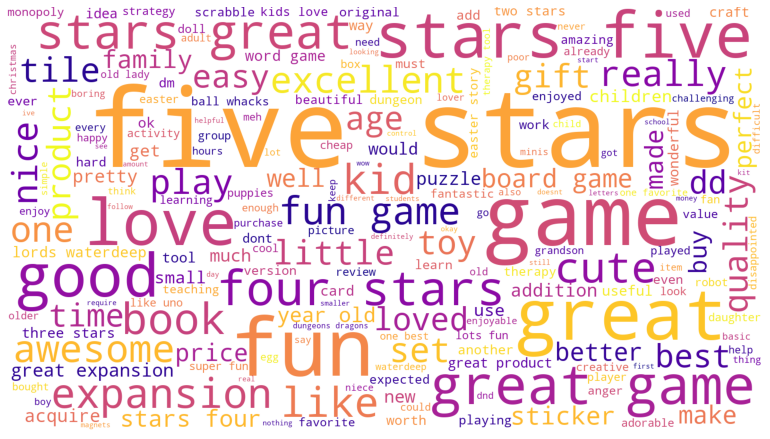

In [407]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
WordCloud_sum_2 = WordCloud(width = 1600, height = 900, 
                           background_color ='white',
                           colormap = 'plasma', 
                           stopwords = 'none',
                           min_font_size = 10).generate(sum_tokens_3_string) 

# Plot the WordCloud image.                    
plt.figure(figsize = (10.5, 6), facecolor = None) 
plt.imshow(WordCloud_sum_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

#### i) Review

In [383]:
# View the frequency distribution.
fdist_rev_2 = FreqDist(rev_tokens_3)

# Preview the data.
fdist_rev_2

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [384]:
# Generate a DataFrame from Counter.
rev_2_counts = pd.DataFrame(Counter(rev_tokens_3).most_common(15),
                            columns=['Rev_Word', 'Rev_Frequency']).set_index('Rev_Word')

# Preview data.
rev_2_counts

,Rev_Frequency
Rev_Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


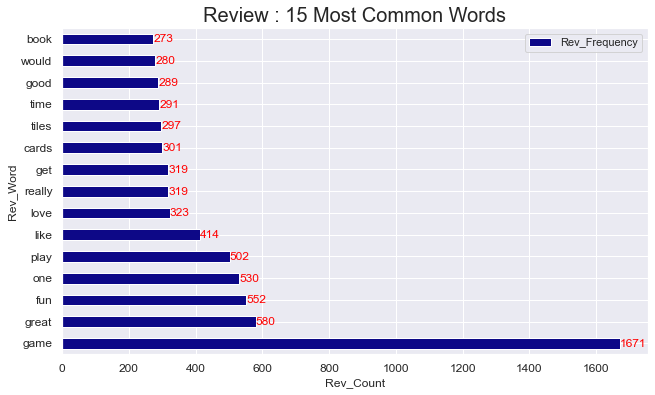

In [406]:
# Set the plot type.
ax = rev_2_counts.plot(kind='barh', figsize=(10.5, 6), fontsize=12, colormap ='plasma')

# Set the labels.
ax.set_xlabel('Rev_Count', fontsize=12)
ax.set_ylabel('Rev_Word', fontsize=12)
ax.set_title("Review : 15 Most Common Words", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

#### ii) Summary

In [386]:
# View the frequency distribution.
fdist_sum_2 = FreqDist(sum_tokens_3)

# Preview the data.
fdist_sum_2

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [387]:
# Generate a DataFrame from Counter.
sum_2_counts = pd.DataFrame(Counter(sum_tokens_3).most_common(15),
                            columns=['Sum_Word', 'Sum_Frequency']).set_index('Sum_Word')

# Preview data.
sum_2_counts

,Sum_Frequency
Sum_Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


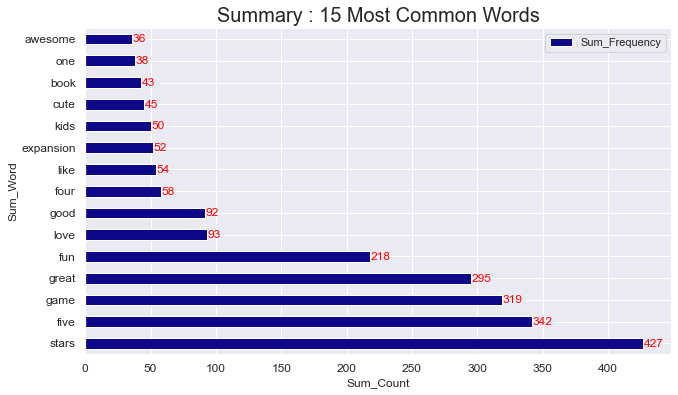

In [408]:
# Set the plot type.
ax = sum_2_counts.plot(kind='barh', figsize=(10.5, 6), fontsize=12, colormap ='plasma')

# Set the labels.
ax.set_xlabel('Sum_Count', fontsize=12)
ax.set_ylabel('Sum_Word', fontsize=12)
ax.set_title("Summary : 15 Most Common Words", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [389]:
# Define a function to extract a polarity for the comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [390]:
# Copy previous dataframe.
df3e = df3d

# Preview the df3e dataframe
df3e.head()

,review,summary,rev_tokens,sum_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


### i. Review

In [391]:
# Determine the average polarity of all the reviews. 
average_rev_polarity = generate_polarity(rev_tokens_3_string)

# View output.
average_rev_polarity

0.13014014633203919

In [392]:
# Extract the polarities for each review.
df3e['rev_pol'] = df3e['review'].apply(generate_polarity)

# Preview the result.
df3e['rev_pol'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rev_pol, dtype: float64

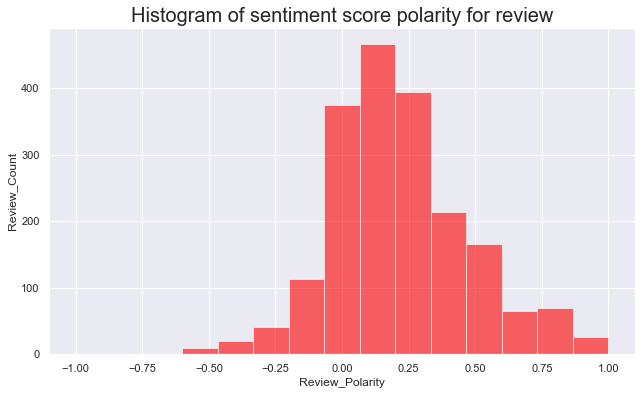

In [409]:
# Create a Histogram of sentiment polarity Score for Review, with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10.5,6))

# Define the bars.
n, bins, patches = plt.hist(df3e['rev_pol'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review_Polarity', fontsize=12)
plt.ylabel('Review_Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for review', fontsize=20)

plt.show()

### ii. Summary

In [394]:
# Determine polarity of the summary column. 
average_sum_polarity = generate_polarity(sum_tokens_3_string)

# View output.
average_sum_polarity

0.2861611083091675

In [395]:
# Extract the polarities for each summary.
df3e['sum_pol'] = df3e['summary'].apply(generate_polarity)

# Preview the result.
df3e['sum_pol'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: sum_pol, dtype: float64

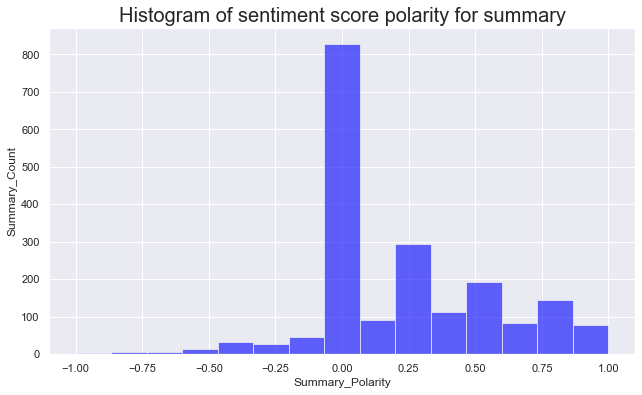

In [410]:
# Create a Histogram of sentiment polarity Score for Review, with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10.5,6))

# Define the bars.
n, bins, patches = plt.hist(df3e['sum_pol'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Summary_Polarity', fontsize=12)
plt.ylabel('Summary_Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [397]:
# Copy the previous dataframe.
df3f = df3e

# Preview the df3f dataframe
df3f.head()

,review,summary,rev_tokens,sum_tokens,rev_pol,sum_pol
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


### i. Review

In [398]:
# Top 20 negative reviews.
# Create a DataFrame.
neg_sent_rev = df3f.nsmallest(20, 'rev_pol')

# Eliminate unnecessary columns.
neg_sent_rev_2 = neg_sent_rev[['review', 'rev_tokens', 'rev_pol']]
neg_sent_rev_2.reset_index(inplace=True)

# Drop the index column created when reseting the original index
neg_sent_rev_2.drop('index', axis = 1, inplace = True) 

# Adjust the column width.
neg_sent_rev_2.style.set_properties(subset=['review'], **{'width': '1200px'})
                                                      
# View output.
neg_sent_rev_2

,review,rev_tokens,rev_pol
0,booo unles you are patient know how to measure...,"[booo, unles, you, are, patient, know, how, to...",-1.000000
1,incomplete kit very disappointing,"[incomplete, kit, very, disappointing]",-0.780000
2,im sorry i just find this product to be boring...,"[im, sorry, i, just, find, this, product, to, ...",-0.583333
3,one of my staff will be using this game soon s...,"[one, of, my, staff, will, be, using, this, ga...",-0.550000
4,i bought this as a christmas gift for my grand...,"[i, bought, this, as, a, christmas, gift, for,...",-0.500000
5,this was a gift for my daughter i found it dif...,"[this, was, a, gift, for, my, daughter, i, fou...",-0.500000
6,i found the directions difficult,"[i, found, the, directions, difficult]",-0.500000
7,instructions are complicated to follow,"[instructions, are, complicated, to, follow]",-0.500000
8,difficult,[difficult],-0.500000
9,expensive for what you get,"[expensive, for, what, you, get]",-0.500000


In [399]:
# Top 20 positive reviews.
# Create a DataFrame.
pos_sent_rev = df3f.nlargest(20, 'rev_pol')

# Eliminate unnecessary columns.
pos_sent_rev_2 = pos_sent_rev[['review', 'rev_tokens', 'rev_pol']]
pos_sent_rev_2.reset_index(inplace=True)

# Drop the index column created when reseting the original index
pos_sent_rev_2.drop('index', axis = 1, inplace = True) 

# Adjust the column width.
pos_sent_rev_2.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output
pos_sent_rev_2

,review,rev_tokens,rev_pol
0,came in perfect condition,"[came, in, perfect, condition]",1.0
1,awesome book,"[awesome, book]",1.0
2,awesome gift,"[awesome, gift]",1.0
3,excellent activity for teaching selfmanagement...,"[excellent, activity, for, teaching, selfmanag...",1.0
4,perfect just what i ordered,"[perfect, just, what, i, ordered]",1.0
5,wonderful product,"[wonderful, product]",1.0
6,delightful product,"[delightful, product]",1.0
7,wonderful for my grandson to learn the resurre...,"[wonderful, for, my, grandson, to, learn, the,...",1.0
8,perfect,[perfect],1.0
9,awesome,[awesome],1.0


### ii. Summary

In [400]:
# Top 20 negative summaries.
# Create a DataFrame.
neg_sent_sum = df3f.nsmallest(20, 'sum_pol')

# Eliminate unnecessary columns.
neg_sent_sum_2 = neg_sent_sum[['summary', 'sum_tokens', 'sum_pol']]
neg_sent_sum_2.reset_index(inplace=True)

# Drop the index column created when reseting the original index
neg_sent_sum_2.drop('index', axis = 1, inplace = True) 

# Adjust the column width.
neg_sent_sum_2.style.set_properties(subset=['review'], **{'width': '1200px'})
                                                      
# View output.
neg_sent_sum_2

,summary,sum_tokens,sum_pol
0,the worst value ive ever seen,"[the, worst, value, ive, ever, seen]",-1.000000
1,boring unless you are a craft person which i am,"[boring, unless, you, are, a, craft, person, w...",-1.000000
2,boring,[boring],-1.000000
3,before this i hated running any rpg campaign d...,"[before, this, i, hated, running, any, rpg, ca...",-0.900000
4,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,...",-0.800000
5,disappointed,[disappointed],-0.750000
6,disappointed,[disappointed],-0.750000
7,disappointed,[disappointed],-0.750000
8,disappointed,[disappointed],-0.750000
9,promotes anger instead of teaching calming met...,"[promotes, anger, instead, of, teaching, calmi...",-0.700000


In [401]:
# Top 20 positive summaries.
# Create a DataFrame.
pos_sent_sum = df3f.nlargest(20, 'sum_pol')

# Eliminate unnecessary columns.
pos_sent_sum_2 = pos_sent_sum[['summary', 'sum_tokens', 'sum_pol']]
pos_sent_sum_2.reset_index(inplace=True)

# Drop the index column created when reseting the original index
pos_sent_sum_2.drop('index', axis = 1, inplace = True) 

# Adjust the column width.
pos_sent_sum_2.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output
pos_sent_sum_2

,summary,sum_tokens,sum_pol
0,best gm screen ever,"[best, gm, screen, ever]",1.0
1,wonderful designs,"[wonderful, designs]",1.0
2,perfect,[perfect],1.0
3,theyre the perfect size to keep in the car or ...,"[theyre, the, perfect, size, to, keep, in, the...",1.0
4,perfect for preschooler,"[perfect, for, preschooler]",1.0
5,awesome sticker activity for the price,"[awesome, sticker, activity, for, the, price]",1.0
6,awesome book,"[awesome, book]",1.0
7,he was very happy with his gift,"[he, was, very, happy, with, his, gift]",1.0
8,awesome,[awesome],1.0
9,awesome and welldesigned for 9 year olds,"[awesome, and, welldesigned, for, 9, year, olds]",1.0


## 7. Discuss: Insights and observations

1. The initial word clouds for review and summary have a emphasis on stopwords such as and, but, it & the, whilst words        used to describe the product are lost in the background. Therefore, further wordclouds removing all the stopwords were      created. 

   The second word cloud for review has a heavy emphasis on game, play, like, great and fun whilst for the                    summary wordcloud there is a heavy emphasis on 4 or 5 stars, great, good, love and fun.
   

2. Looking at the most common words for review, most of the common words pertain to positive descriptive words such as        great, love and good, with some of the other common words related to the goods sold such as game (which is the most        common word, occuring with a frequency of approximately 2.9 times as much as the next most common word, great) and book.

   For summary, stars was the most common word, with 5 being the next most common word afterwards, with stars exceeding the    occurence of five by a value of only 85. Appart from this the most common words for summary are also positive              descriptive words, with there also being a presence of "one", "four" and "kids" also.
   
   
3. Looking at the sentiment score polarities for review and summary, both had a positive sentiment score on                    average, although summary had a stronger positive sentiment on average compared to review (0.137 for review and 0.282      for summary). This means that on average consumers have a positive outlook on the products that they purchased.
   
   For both summary and reviews, the bulk of the reviews/summaries have a polarity at 0.00 (+/- 0.05), with majority          of the remaining summaries lying to the the right hand side of the plot. The sentiment score polarity doesn't fall          below a score of less than -0.6 for any single review wheras for a single summary, the sentiment score polarities          range from -1 to 1. However, it is to be noted that substantially less summaries lie in the negative polarity region 
   of the plot compared to that of review, which leads to summary having a stronger positive sentiment score polarity.
   

4. Looking at the most negative reviews, most consumers who left one of these either found the game purchased to be            difficult or expensive for the overall quality of the product, with some even having complaints about not being sent the    entire contents. The most positive reviews on the other hand delineated that product was either awesome, came in perfect    condition or that it was one of the best product that they had bought.

   Looking at the most negative summaries,most consumers were either dissapointed, found the product to be boring or had      the opinion that the quality was lacking, with some even going on to say that the products promote negative emotions        such as hate. On the other hand, users who posted the most positive summaries, either found the product to be awesome,      perfect or well designed for kids.

# 